# The Equivalent Kernel

The equivalent kernel for an estimation of a linear regression takes the form

$$
    k(x, x') = \beta{\boldsymbol \phi}(x){\bf S}_N{\boldsymbol \phi}(x')
$$

Where
${\bf S}_N = (\alpha{\bf I} + \beta{\boldsymbol \Phi}^T{\boldsymbol \Phi})^{-1}$

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [ ]:
def gaussian_kernel(x, mu, s): return np.exp(-(x - mu)**2 / (2 * s ** 2))

array([[-0.75]])

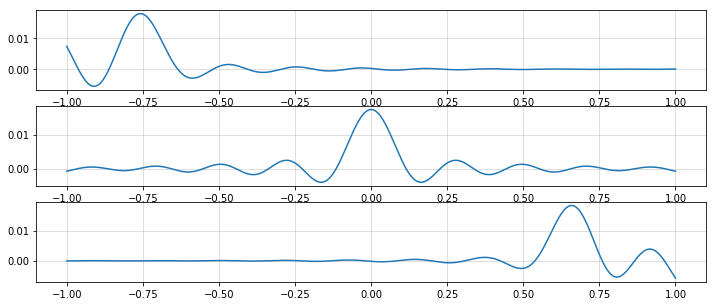

In [170]:
x = np.linspace(-1, 1, 500)
s = 0.1
beta = 2
mus = np.linspace(-1, 1, 20)


xv = [-0.75, 0, 0.65]

fig, ax = plt.subplots(3, 1, figsize=(12, 5))
for axi, xi in zip(ax, xv):
    xi = np.array([xi])[:, np.newaxis]
    phi = gaussian_kernel(xi, mus[np.newaxis, :], s)
    phi_prime = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    SN = inv(beta * phi_prime.T @ phi_prime)
    axi.plot(x, phi_prime @ SN.T @ phi.T)
    axi.grid(alpha=0.5)

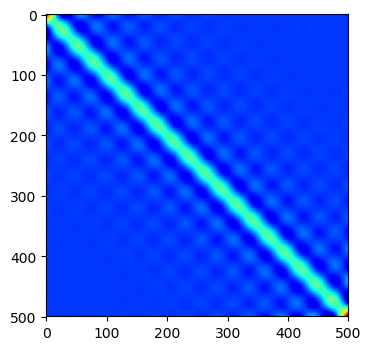

In [157]:
plt.figure(dpi=100)
plt.imshow(phi_prime @ SN.T @ phi_prime.T, cmap="jet")